In [1]:
from itertools import product

import numpy as np
import pandas as pd
from functions import *


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [21]:
#treatment_to_noise_ratio = np.logspace(start=0.0, stop=1.21, num=40)

In [22]:
#treatment_to_noise_ratio

array([ 1.        ,  1.07405282,  1.15358947,  1.23901602,  1.33076866,
        1.42931583,  1.53516071,  1.64884369,  1.77094522,  1.90208872,
        2.04294376,  2.19422951,  2.3567184 ,  2.53124005,  2.71868552,
        2.92001186,  3.13624698,  3.36849493,  3.61794148,  3.88586027,
        4.17361919,  4.48268747,  4.81464314,  5.17118105,  5.55412161,
        5.96542   ,  6.40717619,  6.88164567,  7.39125097,  7.93859397,
        8.52646926,  9.15787838,  9.83604513, 10.56443204, 11.34675806,
       12.18701753, 13.08950059, 14.05881506, 15.09991001, 16.21810097])

In [97]:
from itertools import product
from sys import argv

import numpy as np
import pandas as pd
from functions import *
from statsmodels.nonparametric.kernel_regression import KernelReg


# heteroscedastic = [False]
# p must be p>4
p = [10]
n = [2000,2000]
#treatment_to_noise_ratio = np.logspace(start=0.0, stop=1.25, num=40) # from 0.25 to 20
#treatment_to_noise_ratio = np.linspace(start=1.0, stop = 6.00, num=25)
 # 2.5 - 7.5
    
treatment_to_noise_ratio = [2.32, 4.43]

# (n, p, X_dist, X_correlation, eps_dist, error_type, functional_form, non_zero_beta_count, uniform_upper, standardized_X, method, sim_id)

n_sims = 25


main_effect_cases = ["const", "linear", "non-linear"]
#main_effect_cases = ["non-linear"]

treatment_cases = ["binary","gaussian"]

methods = {
    "pred_band_mean_based_new": pred_band_mean_based_new,
    #"pred_band_weighted_mean_based": pred_band_weighted_mean_based,
    #"pred_band_quantile_based_rf": pred_band_quantile_based_rf,
    #"pred_band_cdf_based": pred_band_cdf_based,
}


methods_keys = list(methods.keys())

simulation_ids = np.arange(n_sims)

index = product(n, p, treatment_to_noise_ratio, main_effect_cases, methods_keys, treatment_cases, simulation_ids)

index = pd.MultiIndex.from_tuples(
    index,
    names=(
        "n",
        "p",
        "treatment_to_noise_ratio",
        "main_effect_case",
        "conformal_method",
        "treatment_case",
        "simulation_id",
    ),
)

df = pd.DataFrame(
    columns=[
        "mean_interval_length",
        "mean_coverage",
        "mean_oracle_length",
        #"share_signif_oracles_given_ite_nonzero",
        #"share_signif_intervals_given_ite_nonzero",
        "MSE(ITE)",
        "base_estimator",
        
        "mean_interval_length_asy",
        "mean_coverage_asy",
        #"share_signif_asy_intervals_given_ite_nonzero",
        
        "mean_interval_length_naive",
        "mean_coverage_naive",
        #"share_signif_naive_intervals_given_ite_nonzero",
        
        "mean_interval_length_naive_asymp",
        "mean_coverage_naive_asymp",
        #"share_signif_naive_asymp_intervals_given_ite_nonzero",
    ],
    index=index,
)


In [98]:
df

mean_interval_length  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                        
200  10 2.32                     const            pred_band_mean_based_new binary         0                              NaN   
                                                                                          1                              NaN   
                                                                                          2                              NaN   
                                                                                          3                              NaN   
                                                                                          4                              NaN   
...                                                                                                                      ...   
2000 10 4.43                     non-linear       pred_band_mean_based_new gaussian       20                             NaN   
                                                                                          21                             NaN   
                                                                                          22                             NaN   
                                                                                          23                             NaN   
                                                                                          24                             NaN   

                                                                                                        mean_coverage  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                 
200  10 2.32                     const            pred_band_mean_based_new binary         0                       NaN   
                                                                                          1                       NaN   
                                                                                          2                       NaN   
                                                                                          3                       NaN   
                                                                                          4                       NaN   
...                                                                                                               ...   
2000 10 4.43                     non-linear       pred_band_mean_based_new gaussian       20                      NaN   
                                                                                          21                      NaN   
                                                                                          22                      NaN   
                                                                                          23                      NaN   
                                                                                          24                      NaN   

                                                                                                        mean_oracle_length  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                      
200  10 2.32                     const            pred_band_mean_based_new binary         0                            NaN   
                                                                                          1                            NaN   
                                                                                          2                            NaN   
                                                                                          3                            NaN   
                                                                                          4                  

In [103]:
df.to_csv("simulation_asymp_methods_n_varies.csv")

In [99]:
df = df[df.index.droplevel(["n","p","conformal_method","main_effect_case", "simulation_id"]).isin([(2.32, 'binary'), (4.43, 'gaussian')])]

In [100]:
df

mean_interval_length  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                        
200  10 2.32                     const            pred_band_mean_based_new binary         0                              NaN   
                                                                                          1                              NaN   
                                                                                          2                              NaN   
                                                                                          3                              NaN   
                                                                                          4                              NaN   
...                                                                                                                      ...   
2000 10 4.43                     non-linear       pred_band_mean_based_new gaussian       20                             NaN   
                                                                                          21                             NaN   
                                                                                          22                             NaN   
                                                                                          23                             NaN   
                                                                                          24                             NaN   

                                                                                                        mean_coverage  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                 
200  10 2.32                     const            pred_band_mean_based_new binary         0                       NaN   
                                                                                          1                       NaN   
                                                                                          2                       NaN   
                                                                                          3                       NaN   
                                                                                          4                       NaN   
...                                                                                                               ...   
2000 10 4.43                     non-linear       pred_band_mean_based_new gaussian       20                      NaN   
                                                                                          21                      NaN   
                                                                                          22                      NaN   
                                                                                          23                      NaN   
                                                                                          24                      NaN   

                                                                                                        mean_oracle_length  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                      
200  10 2.32                     const            pred_band_mean_based_new binary         0                            NaN   
                                                                                          1                            NaN   
                                                                                          2                            NaN   
                                                                                          3                            NaN   
                                                                                          4                  

In [97]:
a = df_cleaned[["mean_interval_length_asy", "mean_coverage_asy", "mean_coverage_naive_asymp","mean_interval_length_naive_asymp"]].groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 50

In [55]:
a.head(5)

MSE(ITE)  \
treatment_to_noise_ratio main_effect_case treatment_case n                 
1.0                      const            gaussian       2000   2.039496   
                                                         20000  2.000102   
                         linear           gaussian       2000   2.035658   
                                                         20000  2.016671   
                         non-linear       gaussian       2000   2.074409   

                                                                mean_coverage_asy  \
treatment_to_noise_ratio main_effect_case treatment_case n                          
1.0                      const            gaussian       2000            0.949007   
                                                         20000           0.950707   
                         linear           gaussian       2000            0.951913   
                                                         20000           0.948933   
                         non-linear       gaussian       2000            0.994273   

                                                                mean_oracle_length  \
treatment_to_noise_ratio main_effect_case treatment_case n                           
1.0                      const            gaussian       2000             4.652349   
                                                         20000            4.652349   
                         linear           gaussian       2000             4.652349   
                                                         20000            4.652349   
                         non-linear       gaussian       2000             4.652349   

                                                                mean_interval_length  \
treatment_to_noise_ratio main_effect_case treatment_case n                             
1.0                      const            gaussian       2000               7.930167   
                                                         20000              7.858940   
                         linear           gaussian       2000               8.000783   
                                                         20000              7.839390   
                         non-linear       gaussian       2000              11.368726   

                                                                mean_interval_length_asy  \
treatment_to_noise_ratio main_effect_case treatment_case n                                 
1.0                      const            gaussian       2000                   5.607475   
                                                         20000                  5.557110   
                         linear           gaussian       2000                   5.657408   
                                                         20000                  5.543286   
                         non-linear       gaussian       2000                   8.038904   

                                                                share_signif_oracles_given_ite_nonzero  \
treatment_to_noise_ratio main_effect_case treatment_case n                                               
1.0                      const            gaussian       2000                                 0.020127   
                                                         20000                                0.019520   
                         linear           gaussian       2000                                 0.020367   
                                                         20000                                0.020040   
                         non-linear       gaussian       2000                                 0.019947   

                                                                share_signif_intervals_given_ite_nonzero  \
treatment_to_noise_ratio main_effect_case treatment_case n                                                 
1.0                      const            gaussian       2000                                   0.000147   
   

In [101]:
cv_sets = 3

pipes_init_dict = {
    "pipe_lin_reg": [('lin_regr', LinearRegression())],
    #"pipe_rf": [('random_forest', RandomForestRegressor(n_jobs=-1))],
    "pipe_lgbm": [('lgbm', lgb.LGBMRegressor())],
}


def init_pipes(pipes_init_dict):
    for pipe_name, pipe_desc in pipes_init_dict.items():
        yield pipe_name, Pipeline(pipe_desc)
        
        
#######################################  Set grid search params ###############

preprocessing_param_grid = {"std_scaler": [{'std_scaler__with_mean': [True]}]}

dim_reduc_param_grid = {"pca": [{'pca__n_components': [1]}]}

estimator_param_grid = {"lin_regr": [{'lin_regr__fit_intercept': [True]}] ,
                        
                       #"random_forest": [{'random_forest__min_samples_leaf': [2, 4, 8], 'random_forest__n_estimators': [1000], 
                       #                   'random_forest__min_samples_split': [2, 4, 6, 15]}],
                        
                        "lgbm": [{"lgbm__num_leaves": [2,3,8,15,50,75,120], "lgbm__learning_rate": [0.001, 0.005, 0.0075,0.01,0.025,0.05,0.075,0.1,0.5,1], "lgbm__n_estimators": [100, 200, 300,800,1000, 1500,2000,5000]}]
                       }


# Construct grid searches
######################################                          ###############

def init_grid_search_objects(pipe_tuples, pipes_init_dict=pipes_init_dict):
    for pipe in pipe_tuples:
        # extract for the given pipe, which methods are used at each stage, e.g. ['std_scaler', 'log_regr']
        stage_methods = [pipe_steps[0] for pipe_steps in pipes_init_dict[pipe[0]]]
        # retrieve for each given method in "stage_methods", the corresponding parameter grid
        param_grid = retrieve_param_grid(stage_methods, preprocessing_param_grid, dim_reduc_param_grid, estimator_param_grid)
        yield pipe[0], GridSearchCV(estimator=pipe[1], param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv_sets, n_jobs=-1)
        
def setup_cross_validate_pipes(X_train, X_test, y_train, y_test):
    def cross_validate_pipes(grid_search_tuples):
        results = []
        for grid_search in grid_search_tuples:
            result_dict = {}
            result_dict['estimator_name']= grid_search[0]
            # fit grid search
            grid_search[1].fit(X_train, y_train)
            # best params
            result_dict['best_params']=  grid_search[1].best_params_
            # best training data fit
            result_dict['training_set_accuracy_best_params']=  grid_search[1].best_score_
            # predict on test data with best params
            y_pred = grid_search[1].predict(X_test)
            # test data accuracy of model with best params
            result_dict['test_set_accuracy_best_params'] =  mean_squared_error(y_test, y_pred)
            results.append(result_dict)
            print(result_dict)
        return results
    return cross_validate_pipes


def retrieve_param_grid(stage_methods_list, preprocessing_param_grid, dim_reduc_param_grid, estimator_param_grid):
    sel_preprocessing_param = []
    sel_dim_reduc_param = []
    sel_estimator_param = []
    for stage_method in stage_methods_list:
        try:
            sel_preprocessing_param = preprocessing_param_grid[stage_method]
        except:
            pass
        
        try:
            sel_dim_reduc_param = dim_reduc_param_grid[stage_method]
        except:
            pass
        
        try:
            sel_estimator_param = estimator_param_grid[stage_method]
        except:
            pass 
        
        joint_params = sel_preprocessing_param + sel_dim_reduc_param + sel_estimator_param
        res = {}
        for d in joint_params:
            res.update(d)
            
        param_grid = [res]
        
    return param_grid  # list of dicts, from the three merged [{}], [{}], [{}]

In [102]:
same_case_as_previous_round = False

# these are wrapper functions for the later conformal inference steps, the basic cross validation works on the raw pipelines above
wrapped_candidate_estimators = {
    "lin_regr": OLS_regressor,
    "random_forest": random_forest_regressor,
    "lgbm": lgbm_regressor
}

candidate_estimators = ["lin_regr", "random_forest", "lgbm"]

for index in df.index:
    
    #if index[6] != 0:
    #    print("Previous index is: " + str(previous_index)) 
    #print("Current index is: " + str(index)) 

    if index[6] != 0:
        same_case_as_previous_round = True
        for i in range(len(previous_index) - 1):
            if previous_index[i] != index[i]:
                same_case_as_previous_round = False
    
    pred_samples = 2000
    total_sample = index[0] + pred_samples
    
    # generate train and test sample:
    ite, mu_1, mu_0, eps_1, eps_0, y_obs, X, W = dgp_ate_zero(n = index[0],
                                                             p = index[1], 
                                                             effect_size = index[2],
                                                             main_effect_case= index[3],
                                                             treatment_case = index[5])
   
    
    # split the generated data into respective categories, one split for each counterfactual:
    
    # Y(1) | W = 1:
    X_train_1, X_conf_1, y_train_1, y_conf_1 = train_test_split(
        X[W==1], y_obs[W==1], test_size=0.3, train_size=0.7
    )
    
    # Y(0) | W = 0:
    X_train_0, X_conf_0, y_train_0, y_conf_0 = train_test_split(
        X[W==0], y_obs[W==0], test_size=0.3, train_size=0.7
    )
    
    # for the regression function f for asymptotic procedure:
    #X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y_obs, test_size=0.25, train_size=0.75)
    
    # draw new samples for later prediction:
    ite_pred, mu_1_pred, mu_0_pred, eps_1_pred, eps_0_pred, y_obs_pred, X_pred, W_pred = dgp_ate_zero(n = pred_samples,
                                                                     p = index[1], 
                                                                     effect_size = index[2],
                                                                     main_effect_case= index[3],
                                                                     treatment_case = index[5])

    
    # tuning of the method:
    if (index[6] == 0) or (not same_case_as_previous_round):
        if (index[4] == "pred_band_quantile_based_rf") or (
            index[4] == "pred_band_cdf_based"
        ):
            nodesize_opt, mat_overview = tune_nodesize_quantile_forest(
                X=X[W==1],
                y=y_obs[W==1],
                nodesize_grid=[10],
                pred_band_method=methods[index[5]],
                n_simulations=1,
            )

        elif (index[4] == "pred_band_mean_based_new") or (
            index[4] == "pred_band_weighted_mean_based"
        ):
            
            cross_validate_pipes = setup_cross_validate_pipes(X_train=X_train_1, X_test=X_conf_1, y_train=y_train_1, y_test=y_conf_1)
            res = cross_validate_pipes(init_grid_search_objects(init_pipes(pipes_init_dict=pipes_init_dict)))
            df_cv_results = pd.DataFrame(res)

            # first element of tuple is the name of the opimal candidate estimator, second element the optimal params for this estimator
            name_opt_estimator, params = extract_optimal_estimator_and_opt_params(df_cv_results=df_cv_results, candidate_estimators=candidate_estimators, minimum_score_optimal=True)
            print(name_opt_estimator)
            print(params)
            print(str(index))

        else:
            raise ValueError("A problem during tuning of the prediction band method occured.")
            
    res_y_1, mu_hat_x_predict_1 = methods[index[4]](
        X_predict=X_pred,
        X_train=X_train_1,
        y_train=y_train_1,
        X_conf=X_conf_1,
        y_conf=y_conf_1,
        alpha=0.05,
        algorithm=wrapped_candidate_estimators[name_opt_estimator],
        params=params
    )
    
    
    res_y_0, mu_hat_x_predict_0 = methods[index[4]](
        X_predict=X_pred,
        X_train=X_train_0,
        y_train=y_train_0,
        X_conf=X_conf_0,
        y_conf=y_conf_0,
        alpha=0.05,
        algorithm=wrapped_candidate_estimators[name_opt_estimator],
        params=params
    )        
            
    res_y_1_asy, mu_hat_x_predict_1_asy = methods[index[4]](
        X_predict=X_pred,
        X_train=X_train_1,
        y_train=y_train_1,
        X_conf=X_conf_1,
        y_conf=y_conf_1,
        alpha=0.1,
        algorithm=wrapped_candidate_estimators[name_opt_estimator],
        params=params
    )
    
    
    res_y_0_asy, mu_hat_x_predict_0_asy = methods[index[4]](
        X_predict=X_pred,
        X_train=X_train_0,
        y_train=y_train_0,
        X_conf=X_conf_0,
        y_conf=y_conf_0,
        alpha=0.1,
        algorithm=wrapped_candidate_estimators[name_opt_estimator],
        params=params
    )
    
    ##### 1): naive finite sample method
    
    lower = res_y_1[:, 0] - res_y_0[:, 1] 
    upper = res_y_1[:, 1] - res_y_0[:, 0] 
    
    ite_bands = np.stack((lower.flatten(), upper.flatten()), axis=1)
    ite_hat_pred = mu_hat_x_predict_1 - mu_hat_x_predict_0
    MSE = mean_squared_error(ite_pred, ite_hat_pred)
                                                                                                         
    length_bands = ite_bands[:, 1] - ite_bands[:, 0]
    mean_interval_length = np.mean(length_bands)

    in_the_range = np.sum((ite_pred.flatten() >= ite_bands[:, 0]) & (ite_pred.flatten() <= ite_bands[:, 1]))
    mean_coverage = in_the_range / len(ite_pred)
    
    # get oracle intervals for the ite's:
    oracle_ints = np.stack(get_oracle_intervals(*calc_normal_params(mu_1= mu_1_pred, mu_0= mu_0_pred, X =X_pred, heteroscedastic=False)), axis=0)
    length_oracle_ints = oracle_ints[:, 1] - oracle_ints[:, 0]
    mean_oracle_length = np.mean(length_oracle_ints)
    
    #### 2): asymptotic guarantee intervals (paper):
    f_predict_1, f_train_1, f_x_conf_1 = wrapped_candidate_estimators[name_opt_estimator](X_predict=X_pred, 
                                                                                     X_train=X[W==1], 
                                                                                     y_train=y_obs[W==1], 
                                                                                     X_conf=X[W==1], 
                                                                                     params=params)
    
    f_predict_0, f_train_0, f_x_conf_0 = wrapped_candidate_estimators[name_opt_estimator](X_predict=X_pred, 
                                                                                     X_train=X[W==0], 
                                                                                     y_train=y_obs[W==0], 
                                                                                     X_conf=X[W==0], 
                                                                                     params=params)
    
    l_1_tilde = f_predict_1.flatten() - ((f_predict_1.flatten() - res_y_1_asy[:, 0].flatten()) / np.sqrt(2))
    l_0_tilde = f_predict_0.flatten() - ((f_predict_0.flatten() - res_y_0_asy[:, 0].flatten()) / np.sqrt(2))
    
    u_1_tilde = f_predict_1.flatten() + ((res_y_1_asy[:, 1].flatten() - f_predict_1.flatten()) / np.sqrt(2))
    u_0_tilde = f_predict_0.flatten() + ((res_y_0_asy[:, 1].flatten() - f_predict_0.flatten()) / np.sqrt(2))
    
    lower_asy = l_1_tilde - u_0_tilde
    upper_asy = u_1_tilde - l_0_tilde
    
    ite_bands_asy = np.stack((lower_asy.flatten(), upper_asy.flatten()), axis=1)
    length_bands_asy = ite_bands_asy[:, 1] - ite_bands_asy[:, 0]
    mean_interval_length_asy = np.mean(length_bands_asy)
    in_the_range_asy = np.sum(
        (ite_pred.flatten() >= ite_bands_asy[:, 0]) & (ite_pred.flatten() <= ite_bands_asy[:, 1])
    )
    mean_coverage_asy = in_the_range_asy / len(ite_pred)
    
    ############################################################
    ##### 3): really naive residuals, by using naive ite method and uncorrected residuals:
    fitted_absolute_residuals_1 = np.abs(y_obs[W==1].flatten() - f_train_1.flatten())
    fitted_absolute_residuals_0 = np.abs(y_obs[W==0].flatten() - f_train_0.flatten())
    
    
    d1 = np.quantile(fitted_absolute_residuals_1, 0.95)
    d0 = np.quantile(fitted_absolute_residuals_0, 0.95)

    pred_band_upper1_naive_pl = f_predict_1 + d1
    pred_band_lower1_naive_pl = f_predict_1 - d1
    
    pred_band_upper0_naive_pl = f_predict_0 + d0
    pred_band_lower0_naive_pl = f_predict_0 - d0
    
    res_y_1_naive_pl = np.stack((pred_band_lower1_naive_pl.flatten(), pred_band_upper1_naive_pl.flatten()), axis=1)
    res_y_0_naive_pl = np.stack((pred_band_lower0_naive_pl.flatten(), pred_band_upper0_naive_pl.flatten()), axis=1)
    
    lower_naive_pl = res_y_1_naive_pl[:, 0] - res_y_0_naive_pl[:, 1] 
    upper_naive_pl = res_y_1_naive_pl[:, 1] - res_y_0_naive_pl[:, 0] 
    
    ite_bands_naive_pl = np.stack((lower_naive_pl.flatten(), upper_naive_pl.flatten()), axis=1)
                                                                                                         
    length_bands_naive_pl = ite_bands_naive_pl[:, 1] - ite_bands_naive_pl[:, 0]
    mean_interval_length_naive_pl = np.mean(length_bands_naive_pl)

    in_the_range_naive_pl = np.sum(
        (ite_pred.flatten() >= ite_bands_naive_pl[:, 0]) & (ite_pred.flatten() <= ite_bands_naive_pl[:, 1])
    )
    mean_coverage_naive_pl = in_the_range_naive_pl / len(ite_pred)
    
    #########################################################################
    # naive but asymp version at level 1-alpha:
    d1_asymp = np.quantile(fitted_absolute_residuals_1, 0.9)
    d0_asymp = np.quantile(fitted_absolute_residuals_0, 0.9)
    
    pred_band_upper1_as = f_predict_1 + d1_asymp
    pred_band_lower1_as = f_predict_1 - d1_asymp
    
    pred_band_upper0_as = f_predict_0 + d0_asymp
    pred_band_lower0_as = f_predict_0 - d0_asymp
    
    res_y_1_as = np.stack((pred_band_lower1_as.flatten(), pred_band_upper1_as.flatten()), axis=1)
    res_y_0_as = np.stack((pred_band_lower0_as.flatten(), pred_band_upper0_as.flatten()), axis=1)
    
    l_1_tilde_as = f_predict_1.flatten() - ((f_predict_1.flatten() - res_y_1_as[:, 0].flatten()) / np.sqrt(2))
    l_0_tilde_as = f_predict_0.flatten() - ((f_predict_0.flatten() - res_y_0_as[:, 0].flatten()) / np.sqrt(2))
    
    u_1_tilde_as = f_predict_1.flatten() + ((res_y_1_as[:, 1].flatten() - f_predict_1.flatten()) / np.sqrt(2))
    u_0_tilde_as = f_predict_0.flatten() + ((res_y_0_as[:, 1].flatten() - f_predict_0.flatten()) / np.sqrt(2))
    
    lower_asy_naive = l_1_tilde_as - u_0_tilde_as
    upper_asy_naive = u_1_tilde_as - l_0_tilde_as
    
    ite_bands_asy_naive = np.stack((lower_asy_naive.flatten(), upper_asy_naive.flatten()), axis=1)
    
    length_bands_asy_naive = ite_bands_asy_naive[:, 1] - ite_bands_asy_naive[:, 0]
    mean_interval_length_asy_naive = np.mean(length_bands_asy_naive)
    in_the_range_asy_naive = np.sum(
        (ite_pred.flatten() >= ite_bands_asy_naive[:, 0]) & (ite_pred.flatten() <= ite_bands_asy_naive[:, 1])
    )
    mean_coverage_asy_naive = in_the_range_asy_naive / len(ite_pred)
    
    ##########################################################################
    df.at[index, "mean_interval_length"] = mean_interval_length
    df.at[index, "mean_coverage"] = mean_coverage
    
    df.at[index, "mean_interval_length_asy"] = mean_interval_length_asy
    df.at[index, "mean_coverage_asy"] = mean_coverage_asy
    
    df.at[index, "mean_oracle_length"] = mean_oracle_length                                               
    #df.at[index, "share_signif_oracles_given_ite_nonzero"] = share_signif_oracles(oracle_intervals=oracle_ints, ite_vals=ite_pred)                                                                                              
    #df.at[index, "share_signif_intervals_given_ite_nonzero"] = share_signif_intervals_given_ite_not_zero(ite_pred_intervals=ite_bands, ite_vals=ite_pred)
    #df.at[index, "share_signif_asy_intervals_given_ite_nonzero"] = share_signif_intervals_given_ite_not_zero(ite_pred_intervals=ite_bands_asy, ite_vals=ite_pred)
    df.at[index, "MSE(ITE)"] = MSE                                                                                                                                                              
    df.at[index, "base_estimator"] = name_opt_estimator
    
    df.at[index, "mean_interval_length_naive"] = mean_interval_length_naive_pl
    df.at[index, "mean_coverage_naive"] = mean_coverage_naive_pl
    #df.at[index, "share_signif_naive_intervals_given_ite_nonzero"] = share_signif_intervals_given_ite_not_zero(ite_pred_intervals=ite_bands_naive, ite_vals=ite_pred)

    df.at[index, "mean_interval_length_naive_asymp"] = mean_interval_length_asy_naive
    df.at[index, "mean_coverage_naive_asymp"] = mean_coverage_asy_naive
    #df.at[index, "share_signif_naive_asymp_intervals_given_ite_nonzero"] = share_signif_intervals_given_ite_not_zero(ite_pred_intervals=ite_bands_asy_naive, ite_vals=ite_pred)

    previous_index = index
    

{'estimator_name': 'pipe_lin_reg', 'best_params': {'lin_regr__fit_intercept': True}, 'training_set_accuracy_best_params': -3.451424936921376, 'test_set_accuracy_best_params': 4.778196034513379}
{'estimator_name': 'pipe_lgbm', 'best_params': {'lgbm__learning_rate': 0.05, 'lgbm__n_estimators': 100, 'lgbm__num_leaves': 2}, 'training_set_accuracy_best_params': -1.0416501846960695, 'test_set_accuracy_best_params': 1.233136258674149}
lgbm
{'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 2}
(200, 10, 2.32, 'const', 'pred_band_mean_based_new', 'binary', 0)
{'estimator_name': 'pipe_lin_reg', 'best_params': {'lin_regr__fit_intercept': True}, 'training_set_accuracy_best_params': -3.8141438458199466, 'test_set_accuracy_best_params': 2.07140871818175}
{'estimator_name': 'pipe_lgbm', 'best_params': {'lgbm__learning_rate': 0.1, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 2}, 'training_set_accuracy_best_params': -2.9985953774578995, 'test_set_accuracy_best_params': 1.946336708047503}
lgbm

In [3]:
#df = pd.read_csv("simulation_constant_treat.csv", index_col=[0,1,2,3,4,5])

In [104]:
df2 = df.drop(["base_estimator"], axis=1)

In [105]:
a = df2.groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 25

In [106]:
a

mean_interval_length  \
treatment_to_noise_ratio main_effect_case treatment_case n                            
2.32                     const            binary         200               9.298295   
                                                         350               8.469235   
                                                         500               8.235762   
                                                         750               8.008049   
                                                         1000              7.991566   
                                                         1500              7.973859   
                                                         2000              7.973521   
                         linear           binary         200              14.362718   
                                                         350              11.628508   
                                                         500              10.517253   
                                                         750               9.731253   
                                                         1000              9.561970   
                                                         1500              8.900150   
                                                         2000              8.667315   
                         non-linear       binary         200              19.561746   
                                                         350              14.409548   
                                                         500              14.018407   
                                                         750              12.512209   
                                                         1000             11.496081   
                                                         1500             10.921647   
                                                         2000             10.320646   
4.43                     const            gaussian       200               9.450044   
                                                         350               8.420825   
                                                         500               8.344145   
                                                         750               8.177626   
                                                         1000              8.124406   
                                                         1500              8.071049   
                                                         2000              7.978472   
                         linear           gaussian       200               9.165366   
                                                         350               8.360850   
                                                         500               8.199571   
                                                         750               8.018795   
                                                         1000              7.833957   
                                                         1500              7.900330   
                                                         2000              8.117737   
                         non-linear       gaussian       200              14.824700   
                                                         350              12.495288   
                                                         500              11.954047   
                                                         750              11.536461   
                                                         1000             11.724680   
                                                         1500             11.464075   
                                                         2000             11.526542   

                                                               mean_coverage  \
treatment_to_noise_ratio main_effect_case treatment_case n                     
2.32                     const            binary         200         0.996

In [69]:
a[a.index.droplevel(["main_effect_case", "n"]).isin([(2.32, 'binary'), (4.43, 'gaussian')])]


mean_interval_length  \
treatment_to_noise_ratio main_effect_case treatment_case n                           
2.32                     const            binary         500              7.703796   
                         linear           binary         500              9.868733   
                         non-linear       binary         500             13.524629   
4.43                     const            gaussian       500              8.461165   
                         linear           gaussian       500              8.607902   
                         non-linear       gaussian       500             11.514349   

                                                              mean_coverage  \
treatment_to_noise_ratio main_effect_case treatment_case n                    
2.32                     const            binary         500        0.99200   
                         linear           binary         500        0.99525   
                         non-linear       binary         500        1.00000   
4.43                     const            gaussian       500        0.99400   
                         linear           gaussian       500        0.99675   
                         non-linear       gaussian       500        1.00000   

                                                              mean_oracle_length  \
treatment_to_noise_ratio main_effect_case treatment_case n                         
2.32                     const            binary         500            4.652349   
                         linear           binary         500            4.652349   
                         non-linear       binary         500            4.652349   
4.43                     const            gaussian       500            4.652349   
                         linear           gaussian       500            4.652349   
                         non-linear       gaussian       500            4.652349   

                                                              MSE(ITE)  \
treatment_to_noise_ratio main_effect_case treatment_case n               
2.32                     const            binary         500  2.075279   
                         linear           binary         500  2.826189   
                         non-linear       binary         500  3.608447   
4.43                     const            gaussian       500  2.094511   
                         linear           gaussian       500  2.150759   
                         non-linear       gaussian       500  2.201051   

                                                              mean_interval_length_asy  \
treatment_to_noise_ratio main_effect_case treatment_case n                               
2.32                     const            binary         500                  4.626894   
                         linear           binary         500                  6.036409   
                         non-linear       binary         500                  7.130679   
4.43                     const            gaussian       500                  4.877094   
                         linear           gaussian       500                  4.774118   
                         non-linear       gaussian       500                  6.206980   

                                                              mean_coverage_asy  \
treatment_to_noise_ratio main_effect_case treatment_case n                        
2.32                     const            binary         500            0.88825   
                         linear           binary         500            0.93050   
                         non-linear       binary         500            0.95200   
4.43                     const            gaussian       500            0.91000   
                         linear           gaussian       500            0.89300   
                         non-linear       gaussian       500            0.96200   

                                                              mean_interval_length_naive

In [63]:
a

mean_interval_length  \
treatment_to_noise_ratio main_effect_case treatment_case n                           
2.32                     const            binary         500              7.703796   
                                          gaussian       500              8.731736   
                         linear           binary         500              9.868733   
                                          gaussian       500              8.080553   
                         non-linear       binary         500             13.524629   
                                          gaussian       500             11.573984   
4.43                     const            binary         500              7.654948   
                                          gaussian       500              8.461165   
                         linear           binary         500             10.490448   
                                          gaussian       500              8.607902   
                         non-linear       binary         500             14.255560   
                                          gaussian       500             11.514349   

                                                              mean_coverage  \
treatment_to_noise_ratio main_effect_case treatment_case n                    
2.32                     const            binary         500        0.99200   
                                          gaussian       500        0.99800   
                         linear           binary         500        0.99525   
                                          gaussian       500        0.99300   
                         non-linear       binary         500        1.00000   
                                          gaussian       500        1.00000   
4.43                     const            binary         500        0.99350   
                                          gaussian       500        0.99400   
                         linear           binary         500        0.99875   
                                          gaussian       500        0.99675   
                         non-linear       binary         500        0.99975   
                                          gaussian       500        1.00000   

                                                              mean_oracle_length  \
treatment_to_noise_ratio main_effect_case treatment_case n                         
2.32                     const            binary         500            4.652349   
                                          gaussian       500            4.652349   
                         linear           binary         500            4.652349   
                                          gaussian       500            4.652349   
                         non-linear       binary         500            4.652349   
                                          gaussian       500            4.652349   
4.43                     const            binary         500            4.652349   
                                          gaussian       500            4.652349   
                         linear           binary         500            4.652349   
                                          gaussian       500            4.652349   
                         non-linear       binary         500            4.652349   
                                          gaussian       500            4.652349   

                                                              MSE(ITE)  \
treatment_to_noise_ratio main_effect_case treatment_case n               
2.32                     const            binary         500  2.075279   
                                          gaussian       500  2.129343   
                         linear           binary         500  2.826189   
                                          gaussian       500  2.178039   
                         non-linear       binary         500  3.608447   
                                          gaussian     

In [10]:
const_df = a.iloc[a.index.get_level_values('main_effect_case') == "const"]
const_df.reset_index(level=0, inplace=True)
const_df.reset_index(level=0, inplace=True)

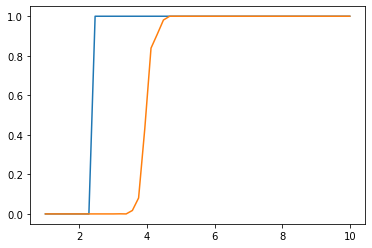

In [12]:
plt.plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_oracles_given_ite_nonzero"])
plt.plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_intervals_given_ite_nonzero"])

In [13]:
linear_df = a.iloc[a.index.get_level_values('main_effect_case') == "linear"]
linear_df.reset_index(level=0, inplace=True)
linear_df.reset_index(level=0, inplace=True)

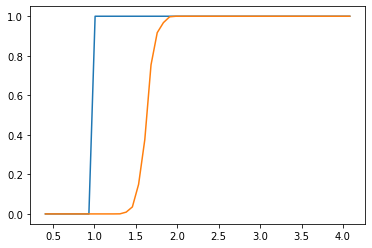

In [55]:
plt.plot(linear_df["treatment_to_noise_ratio"] / 2.45 , linear_df["share_signif_oracles_given_ite_nonzero"])
plt.plot(linear_df["treatment_to_noise_ratio"] / 2.45 , linear_df["share_signif_intervals_given_ite_nonzero"])

In [15]:
non_linear = a.iloc[a.index.get_level_values('main_effect_case') == "non-linear"]
non_linear.reset_index(level=0, inplace=True)
non_linear.reset_index(level=0, inplace=True)

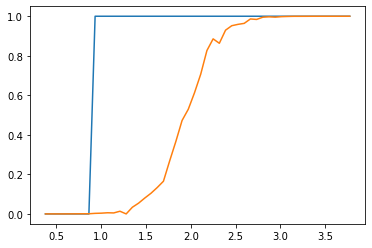

In [62]:
plt.plot(non_linear["treatment_to_noise_ratio"] / 2.65, non_linear["share_signif_oracles_given_ite_nonzero"])
plt.plot(non_linear["treatment_to_noise_ratio"] / 2.65, non_linear["share_signif_intervals_given_ite_nonzero"])

In [19]:
df2_binary = pd.read_csv("simulation_ate_zero_part_1.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian = pd.read_csv("simulation_ate_zero_part_2.csv", index_col=[0,1,2,3,4,5,6])

In [22]:
df2_binary

mean_interval_length  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                         
2000 10 1.0                      const            pred_band_mean_based_new binary         0                          7.998524   
                                                                                          1                          8.107752   
                                                                                          2                          7.593277   
                                                                                          3                          7.692834   
                                                                                          4                          8.036855   
...                                                                                                                       ...   
        8.0                      non-linear       pred_band_mean_based_new binary         95                        11.837645   
                                                                                          96                        10.752660   
                                                                                          97                        10.119058   
                                                                                          98                         9.586488   
                                                                                          99                        10.940118   

                                                                                                         mean_coverage  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                  
2000 10 1.0                      const            pred_band_mean_based_new binary         0                     0.9965   
                                                                                          1                     0.9955   
                                                                                          2                     0.9925   
                                                                                          3                     0.9950   
                                                                                          4                     0.9970   
...                                                                                                                ...   
        8.0                      non-linear       pred_band_mean_based_new binary         95                    0.9990   
                                                                                          96                    0.9995   
                                                                                          97                    0.9985   
                                                                                          98                    0.9965   
                                                                                          99                    1.0000   

                                                                                                         mean_oracle_length  \
n    p  treatment_to_noise_ratio main_effect_case conformal_method         treatment_case simulation_id                       
2000 10 1.0                      const            pred_band_mean_based_new binary         0                        4.652349   
                                                                                          1                        4.652349   
                                                                                          2                        4.652349   
                                                                                          3                        4.652349   
                                                                              

In [23]:
binary = df2_binary[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

In [24]:
binary

mean_interval_length  \
treatment_to_noise_ratio main_effect_case                         
1.000000                 const                         7.989603   
                         linear                        8.678546   
                         non-linear                   10.341534   
1.118644                 const                         7.927345   
                         linear                        8.727692   
...                                                         ...   
7.881356                 linear                        8.637773   
                         non-linear                   10.473123   
8.000000                 const                         7.963760   
                         linear                        8.778067   
                         non-linear                   10.387797   

                                           mean_coverage  mean_oracle_length  \
treatment_to_noise_ratio main_effect_case                                      
1.000000                 const                  0.994490            4.652349   
                         linear                 0.995150            4.652349   
                         non-linear             0.997555            4.652349   
1.118644                 const                  0.994270            4.652349   
                         linear                 0.995725            4.652349   
...                                                  ...                 ...   
7.881356                 linear                 0.995135            4.652349   
                         non-linear             0.998080            4.652349   
8.000000                 const                  0.994340            4.652349   
                         linear                 0.995995            4.652349   
                         non-linear             0.998090            4.652349   

                                           share_intervals_signif_if_oracle_signif  \
treatment_to_noise_ratio main_effect_case                                            
1.000000                 const                                           -1.000000   
                         linear                                          -1.000000   
                         non-linear                                      -1.000000   
1.118644                 const                                           -1.000000   
                         linear                                          -1.000000   
...                                                                            ...   
7.881356                 linear                                           0.999995   
                         non-linear                                       0.996305   
8.000000                 const                                            1.000000   
                         linear                                           0.999985   
                         non-linear                                       0.997890   

                                           share_signif_oracles_given_ite_nonzero  \
treatment_to_noise_ratio main_effect_case                                           
1.000000                 const                                                0.0   
                         linear                                               0.0   
                         non-linear                                           0.0   
1.118644                 const                                                0.0   
                         linear                                               0.0   
...                                                                           ...   
7.881356                 linear                                               1.0   
                         non-linear                                           1.0   
8.000000                 const                                                1.0   
                         linear                                             

In [25]:
const_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "const"]
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin.reset_index(level=0, inplace=True)

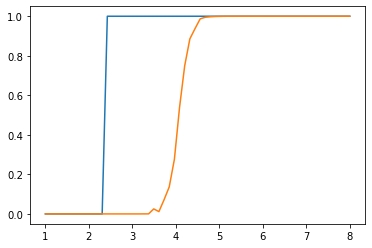

In [26]:
plt.plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_oracles_given_ite_nonzero"])
plt.plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_intervals_given_ite_nonzero"])

In [73]:
lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin.reset_index(level=0, inplace=True)

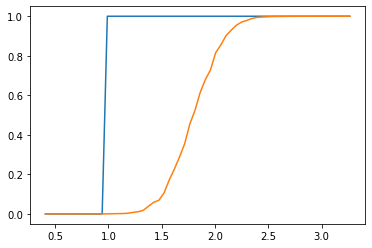

In [74]:
plt.plot(lin_df_bin["treatment_to_noise_ratio"] / 2.45, lin_df_bin["share_signif_oracles_given_ite_nonzero"])
plt.plot(lin_df_bin["treatment_to_noise_ratio"] / 2.45, lin_df_bin["share_signif_intervals_given_ite_nonzero"])

In [30]:
non_lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin.reset_index(level=0, inplace=True)

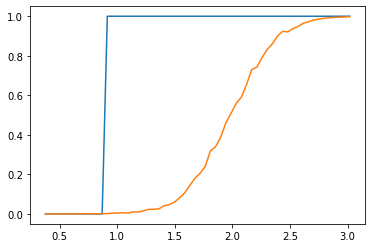

In [79]:
plt.plot(non_lin_df_bin["treatment_to_noise_ratio"] / 2.65, non_lin_df_bin["share_signif_oracles_given_ite_nonzero"])
plt.plot(non_lin_df_bin["treatment_to_noise_ratio"] / 2.65, non_lin_df_bin["share_signif_intervals_given_ite_nonzero"])

In [33]:
gaussian = df2_gaussian[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

In [34]:
const_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian.reset_index(level=0, inplace=True)

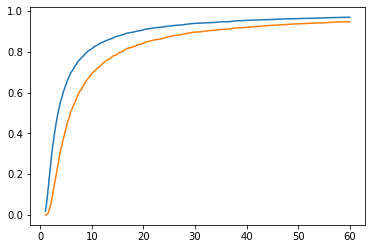

In [35]:
plt.plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_oracles_given_ite_nonzero"])
plt.plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_intervals_given_ite_nonzero"])

In [36]:
lin_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian.reset_index(level=0, inplace=True)

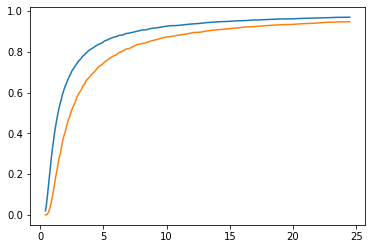

In [89]:
plt.plot(lin_df_gaussian["treatment_to_noise_ratio"] / 2.45, lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])
plt.plot(lin_df_gaussian["treatment_to_noise_ratio"] / 2.45, lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])

In [38]:
non_lin_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian.reset_index(level=0, inplace=True)

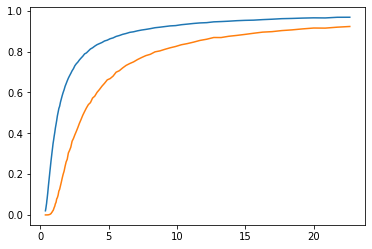

In [88]:
plt.plot(non_lin_df_gaussian["treatment_to_noise_ratio"] / 2.65, non_lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])
plt.plot(non_lin_df_gaussian["treatment_to_noise_ratio"] / 2.65, non_lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])

In [63]:
ite, mu_1, mu_0, eps_1, eps_0, y_obs, X, W = dgp_const_treat(n=1000000, p=10, effect_size=1.0, main_effect_case="non-linear")

In [64]:
np.std(y_obs[W==0])

2.6538728595320165

In [86]:
ite, mu_1, mu_0, eps_1, eps_0, y_obs, X, W = dgp_ate_zero(n=100000, p=10, effect_size=2.0, main_effect_case="non-linear", treatment_case="gaussian")

In [87]:
np.std(y_obs[W==0])

2.656898376852144

In [138]:
df_3_m3 = pd.read_csv("simulation_ate_zero_gaussian_m_3.csv", index_col=[0,1,2,3,4,5,6])
gaussian_m3 = df_3_m3[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["n","treatment_to_noise_ratio"]).mean()


In [140]:
gaussian_m3.iloc[gaussian_m3.index.get_level_values('n') == 2000]


mean_interval_length  mean_coverage  \
n    treatment_to_noise_ratio                                        
2000 1.000000                             10.346041        0.99760   
     1.056818                             10.559023        0.99796   
     1.116863                             10.511795        0.99775   
     1.180321                             10.600030        0.99827   
     1.247384                             10.687987        0.99839   
     1.318257                             10.497002        0.99802   
     1.393157                             10.617833        0.99795   
     1.472313                             10.609919        0.99799   
     1.555966                             10.574541        0.99756   
     1.644372                             10.566841        0.99809   
     1.737801                             10.596103        0.99738   
     1.836538                             10.647440        0.99798   
     1.940886                             10.761709        0.99778   
     2.051162                             10.768229        0.99787   
     2.167704                             10.793372        0.99755   
     2.290868                             10.846536        0.99800   
     2.421029                             10.792863        0.99766   
     2.558586                             10.905519        0.99752   
     2.703958                             10.902009        0.99738   
     2.857591                             10.937034        0.99780   
     3.019952                             10.953507        0.99731   
     3.191538                             11.144903        0.99782   
     3.372873                             11.185686        0.99753   
     3.564511                             11.125575        0.99684   
     3.767038                             11.342285        0.99738   
     3.981072                             11.516236        0.99744   
     4.207266                             12.460558        0.99934   
     4.446313                             11.430730        0.99656   
     4.698941                             11.643547        0.99669   
     4.965923                             12.640178        0.99908   
     5.248075                             12.929011        0.99916   
     5.546257                             12.051930        0.99638   
     5.861382                             12.921454        0.99877   
     6.194411                             13.005514        0.99874   
     6.546362                             13.151218        0.99845   
     6.918310                             13.343349        0.99810   
     7.311391                             13.377810        0.99782   
     7.726806                             13.503411        0.99726   
     8.165824                             13.701533        0.99735   
     8.629785                             13.751729        0.99653   
     9.120108                             14.036455        0.99651   
     9.638290                             14.361605        0.99605   
     10.185914                            14.499556        0.99522   
     10.764652                            14.721295        0.99477   
     11.376273                            14.869926        0.99452   
     12.022644                            15.143323        0.99360   
     12.705741                            15.277078        0.99316   
     13.427650                            15.549779        0.99226   
     14.190575                            16.014798        0.99129   
     14.996848                            16.245943        0.99016   

                               mean_oracle_length  \
n    treatment_to_noise_ratio                       
2000 1.000000                            4.652349   
     1.056818                            4.652349   
     1.116863                            4.652349   
     1.180321                            4.652349   
     1.247384                            4.652349   
     1.318257      

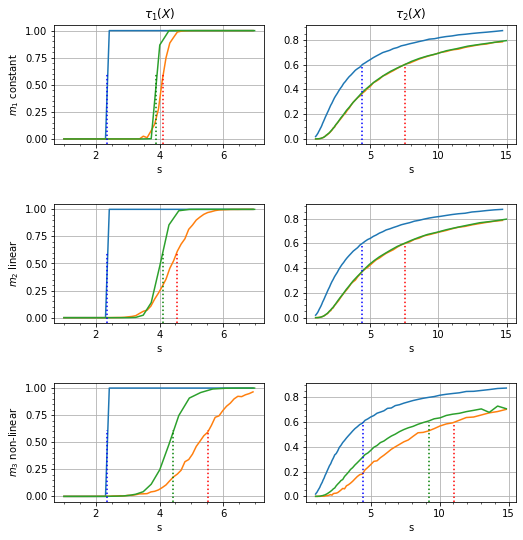

In [7]:
fig, axs = plt.subplots(3,2,figsize=(8.27,8.7675), sharex=False, sharey=False)

df2_binary = pd.read_csv("simulation_ate_zero_part_1.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian = pd.read_csv("simulation_ate_zero_part_2.csv", index_col=[0,1,2,3,4,5,6])
#df_3_gaussian= pd.read_csv("simulation_ate_zero_n_small_gaussian.csv", index_col=[0,1,2,3,4,5,6])
df_3_m3 = pd.read_csv("simulation_ate_zero_gaussian_m_3.csv", index_col=[0,1,2,3,4,5,6])

binary = df2_binary[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian = df2_gaussian[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

#gaussian = df_3_gaussian[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian_m3 = df_3_m3[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["n","treatment_to_noise_ratio"]).mean()


df2_binary_n_large = pd.read_csv("simulation_ate_zero_part_1_10000.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian_n_large = pd.read_csv("simulation_ate_zero_part_2_10000.csv", index_col=[0,1,2,3,4,5,6])

binary_n_large = df2_binary_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian_n_large = df2_gaussian_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()



plt.subplots_adjust(hspace=0.5)

# first row left

const_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "const"]
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin = const_df_bin[const_df_bin["treatment_to_noise_ratio"] <= 7.00]

const_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "const"]
const_df_bin_n_large.reset_index(level=0, inplace=True)
const_df_bin_n_large.reset_index(level=0, inplace=True)
const_df_bin_n_large = const_df_bin_n_large[const_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]


#axs[0, 0].set_ylim([0, 1.2])
axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_oracles_given_ite_nonzero"])

axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[0, 0].plot(const_df_bin_n_large["treatment_to_noise_ratio"], const_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])


axs[0, 0].axvline(x=4.1, ymax=0.6, color="red", linestyle=":")
axs[0, 0].axvline(x=3.9, ymax=0.6, color="green", linestyle=":")

axs[0, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[0, 0].grid(True)
axs[0, 0].minorticks_on()

axs[0, 0].set_ylabel("$m_1$ constant")
axs[0, 0].set_xlabel("s")
axs[0, 0].title.set_text("$\\tau_1(X)$")

# first row right
const_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian = const_df_gaussian[const_df_gaussian["treatment_to_noise_ratio"] <= 15.00]

const_df_gaussian_n_large = gaussian_n_large.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian_n_large.reset_index(level=0, inplace=True)
const_df_gaussian_n_large.reset_index(level=0, inplace=True)
const_df_gaussian_n_large = const_df_gaussian_n_large[const_df_gaussian_n_large["treatment_to_noise_ratio"] <= 15.00]



#axs[0, 1].set_ylim([0, 1.2])
axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_oracles_given_ite_nonzero"])

axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[0, 1].plot(const_df_gaussian_n_large["treatment_to_noise_ratio"], const_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])

axs[0, 1].axvline(x=7.586, ymax=0.67, color="red", linestyle=":")
axs[0, 1].axvline(x=4.431446,ymax=0.67, color="blue", linestyle=":")

axs[0, 1].grid(True)
axs[0, 1].minorticks_on()
axs[0, 1].set_xlabel("s")
axs[0, 1].title.set_text('$\\tau_2(X)$')


# second row left
lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin = lin_df_bin[lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]

lin_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin_n_large.reset_index(level=0, inplace=True)
lin_df_bin_n_large.reset_index(level=0, inplace=True)
lin_df_bin_n_large = lin_df_bin_n_large[lin_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]



axs[1, 0].set_ylabel("$m_2$ linear")
#axs[1, 0].set_ylim([0, 1.2])

axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_oracles_given_ite_nonzero"])

axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[1, 0].plot(lin_df_bin_n_large["treatment_to_noise_ratio"] , lin_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])

axs[1, 0].axvline(x=4.1, ymax=0.6, color="green", linestyle=":")
axs[1, 0].axvline(x=4.55, ymax=0.6, color="red", linestyle=":")

axs[1, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[1, 0].set_xlabel("s")
axs[1, 0].grid(True)
axs[1, 0].minorticks_on()


# second row right
lin_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian = lin_df_gaussian[lin_df_gaussian["treatment_to_noise_ratio"] <= 15.00]

lin_df_gaussian_n_large = gaussian_n_large.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
lin_df_gaussian_n_large = lin_df_gaussian_n_large[lin_df_gaussian_n_large["treatment_to_noise_ratio"] <= 15.00]




#axs[1, 1].set_ylim([0, 1.2])
axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])

axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[1, 1].plot(lin_df_gaussian_n_large["treatment_to_noise_ratio"] , lin_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])

axs[1, 1].axvline(x=7.586129, ymax=0.66, color="red", linestyle=":")
axs[1, 1].axvline(x=4.431446, ymax=0.66, color="blue", linestyle=":")

axs[1, 1].grid(True)
axs[1, 1].minorticks_on()
axs[1, 1].set_xlabel("s")


# third row left
non_lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin = non_lin_df_bin[non_lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]


non_lin_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin_n_large.reset_index(level=0, inplace=True)
non_lin_df_bin_n_large.reset_index(level=0, inplace=True)
non_lin_df_bin_n_large = non_lin_df_bin_n_large[non_lin_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]


#axs[2, 0].set_ylim([0, 1.2])
axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_oracles_given_ite_nonzero"])

axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[2, 0].plot(non_lin_df_bin_n_large["treatment_to_noise_ratio"] , non_lin_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])


axs[2, 0].axvline(x=5.508475, ymax=0.6, color="red", linestyle=":")
axs[2, 0].axvline(x=4.42, ymax=0.6, color="green", linestyle=":")

axs[2, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[2, 0].grid(True)
axs[2, 0].minorticks_on()
axs[2, 0].set_ylabel("$m_3$ non-linear")
axs[2, 0].set_xlabel("s")


# third row right

non_lin_df_gaussian = gaussian_m3.iloc[gaussian_m3.index.get_level_values('n') == 2000]
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian = non_lin_df_gaussian[non_lin_df_gaussian["treatment_to_noise_ratio"]  <= 15.00]


#non_lin_df_gaussian = gaussian_m3.iloc[gaussian_m3.index.get_level_values('main_effect_case') == "non-linear"]
#non_lin_df_gaussian.reset_index(level=0, inplace=True)
#non_lin_df_gaussian.reset_index(level=0, inplace=True)
#non_lin_df_gaussian = non_lin_df_gaussian[non_lin_df_gaussian["treatment_to_noise_ratio"]  <= 15.00]



non_lin_df_gaussian_n_large = gaussian_m3.iloc[gaussian_m3.index.get_level_values('n') == 20000]
non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
non_lin_df_gaussian_n_large = non_lin_df_gaussian_n_large[non_lin_df_gaussian_n_large["treatment_to_noise_ratio"]  <= 15.00]


#non_lin_df_gaussian_n_large = gaussian_m3.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "non-linear"]
#non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
#non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
#non_lin_df_gaussian_n_large = non_lin_df_gaussian_n_large[non_lin_df_gaussian_n_large["treatment_to_noise_ratio"]  <= 15.00]



#axs[2, 1].set_ylim([0, 1.2])
axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])

axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[2, 1].plot(non_lin_df_gaussian_n_large["treatment_to_noise_ratio"] , non_lin_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])

axs[2, 1].axvline(x=11.006686, ymax=0.65, color="red", linestyle=":")
axs[2, 1].axvline(x=9.23, ymax=0.67, color="green", linestyle=":")

axs[2, 1].axvline(x=4.431446, ymax=0.67, color="blue", linestyle=":")

axs[2, 1].grid(True)
axs[2, 1].minorticks_on()
axs[2, 1].set_xlabel("s")


plt.savefig('figure_ite_ints.pdf')

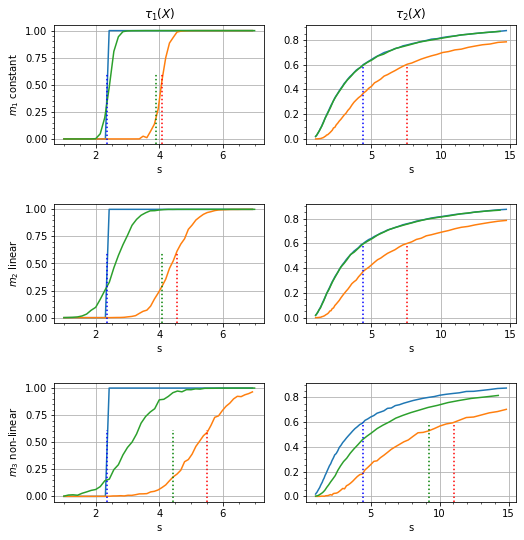

In [27]:
fig, axs = plt.subplots(3,2,figsize=(8.27,8.7675), sharex=False, sharey=False)

df2_binary = pd.read_csv("simulation_ate_zero_part_1.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian = pd.read_csv("simulation_ate_zero_part_2.csv", index_col=[0,1,2,3,4,5,6])
#df_3_gaussian= pd.read_csv("simulation_ate_zero_n_small_gaussian.csv", index_col=[0,1,2,3,4,5,6])
df_3_m3 = pd.read_csv("simulation_ate_zero_gaussian_m_3.csv", index_col=[0,1,2,3,4,5,6])

binary = df2_binary[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian = df2_gaussian[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

#gaussian = df_3_gaussian[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian_m3 = df_3_m3[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["n","treatment_to_noise_ratio"]).mean()



df2_binary_n_large = pd.read_csv("simulation_ate_zero_part_1_10000.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian_n_large = pd.read_csv("simulation_ate_zero_part_2_10000.csv", index_col=[0,1,2,3,4,5,6])

binary_n_large = df2_binary_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian_n_large = df2_gaussian_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

df_asymp_bin = pd.read_csv("simulation_binary_asymp_corrected.csv", index_col=[0,1,2,3,4,5,6])
df_asymp_gauss = pd.read_csv("simulation_gaussian_asymp_corrected.csv", index_col=[0,1,2,3,4,5,6])

df_asymp_bin = df_asymp_bin[["share_signif_asy_intervals_given_ite_nonzero"]].groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 50
df_asymp_gauss = df_asymp_gauss[["share_signif_asy_intervals_given_ite_nonzero"]].groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 50

plt.subplots_adjust(hspace=0.5)

# first row left

const_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "const"]
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin = const_df_bin[const_df_bin["treatment_to_noise_ratio"] <= 7.00]

const_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "const"]
const_df_bin_n_large.reset_index(level=0, inplace=True)
const_df_bin_n_large.reset_index(level=0, inplace=True)
const_df_bin_n_large = const_df_bin_n_large[const_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]

const_asym = df_asymp_bin.iloc[(df_asymp_bin.index.get_level_values('main_effect_case') == "const") & (df_asymp_bin.index.get_level_values('n') == 2000)]
const_asym.reset_index(level=0, inplace=True)
const_asym.reset_index(level=0, inplace=True)
const_asym = const_asym[const_asym["treatment_to_noise_ratio"] <= 7.00]


#axs[0, 0].set_ylim([0, 1.2])
axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_oracles_given_ite_nonzero"])

axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_intervals_given_ite_nonzero"])
#axs[0, 0].plot(const_df_bin_n_large["treatment_to_noise_ratio"], const_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])
axs[0, 0].plot(const_asym["treatment_to_noise_ratio"], const_asym["share_signif_asy_intervals_given_ite_nonzero"])


axs[0, 0].axvline(x=4.1, ymax=0.6, color="red", linestyle=":")
axs[0, 0].axvline(x=3.9, ymax=0.6, color="green", linestyle=":")

axs[0, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[0, 0].grid(True)
axs[0, 0].minorticks_on()

axs[0, 0].set_ylabel("$m_1$ constant")
axs[0, 0].set_xlabel("s")
axs[0, 0].title.set_text("$\\tau_1(X)$")

# first row right
const_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian = const_df_gaussian[const_df_gaussian["treatment_to_noise_ratio"] <= 15.00]

const_df_gaussian_n_large = gaussian_n_large.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian_n_large.reset_index(level=0, inplace=True)
const_df_gaussian_n_large.reset_index(level=0, inplace=True)
const_df_gaussian_n_large = const_df_gaussian_n_large[const_df_gaussian_n_large["treatment_to_noise_ratio"] <= 15.00]

const_asym_g = df_asymp_gauss.iloc[(df_asymp_gauss.index.get_level_values('main_effect_case') == "const") & (df_asymp_gauss.index.get_level_values('n') == 2000)]
const_asym_g.reset_index(level=0, inplace=True)
const_asym_g.reset_index(level=0, inplace=True)
const_asym_g = const_asym_g[const_asym_g["treatment_to_noise_ratio"] <= 15.00]



#axs[0, 1].set_ylim([0, 1.2])
axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_oracles_given_ite_nonzero"])

axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_intervals_given_ite_nonzero"])
#axs[0, 1].plot(const_df_gaussian_n_large["treatment_to_noise_ratio"], const_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])
axs[0, 1].plot(const_asym_g["treatment_to_noise_ratio"], const_asym_g["share_signif_asy_intervals_given_ite_nonzero"])



axs[0, 1].axvline(x=7.586, ymax=0.67, color="red", linestyle=":")
axs[0, 1].axvline(x=4.431446,ymax=0.67, color="blue", linestyle=":")

axs[0, 1].grid(True)
axs[0, 1].minorticks_on()
axs[0, 1].set_xlabel("s")
axs[0, 1].title.set_text('$\\tau_2(X)$')


# second row left
lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin = lin_df_bin[lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]

lin_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin_n_large.reset_index(level=0, inplace=True)
lin_df_bin_n_large.reset_index(level=0, inplace=True)
lin_df_bin_n_large = lin_df_bin_n_large[lin_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]

const_asym_lin = df_asymp_bin.iloc[(df_asymp_bin.index.get_level_values('main_effect_case') == "linear") & (df_asymp_bin.index.get_level_values('n') == 2000)]
const_asym_lin.reset_index(level=0, inplace=True)
const_asym_lin.reset_index(level=0, inplace=True)
const_asym_lin = const_asym_lin[const_asym_lin["treatment_to_noise_ratio"] <= 7.00]


axs[1, 0].set_ylabel("$m_2$ linear")
#axs[1, 0].set_ylim([0, 1.2])

axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_oracles_given_ite_nonzero"])

axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_intervals_given_ite_nonzero"])
#axs[1, 0].plot(lin_df_bin_n_large["treatment_to_noise_ratio"] , lin_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])
axs[1, 0].plot(const_asym_lin["treatment_to_noise_ratio"], const_asym_lin["share_signif_asy_intervals_given_ite_nonzero"])


axs[1, 0].axvline(x=4.1, ymax=0.6, color="green", linestyle=":")
axs[1, 0].axvline(x=4.55, ymax=0.6, color="red", linestyle=":")

axs[1, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[1, 0].set_xlabel("s")
axs[1, 0].grid(True)
axs[1, 0].minorticks_on()


# second row right
lin_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian = lin_df_gaussian[lin_df_gaussian["treatment_to_noise_ratio"] <= 15.00]

lin_df_gaussian_n_large = gaussian_n_large.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
lin_df_gaussian_n_large = lin_df_gaussian_n_large[lin_df_gaussian_n_large["treatment_to_noise_ratio"] <= 15.00]


const_asym_g_lin = df_asymp_gauss.iloc[(df_asymp_gauss.index.get_level_values('main_effect_case') == "linear") & (df_asymp_gauss.index.get_level_values('n') == 2000)]
const_asym_g_lin.reset_index(level=0, inplace=True)
const_asym_g_lin.reset_index(level=0, inplace=True)
const_asym_g_lin = const_asym_g_lin[const_asym_g_lin["treatment_to_noise_ratio"] <= 15.00]


#axs[1, 1].set_ylim([0, 1.2])
axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])

axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
#axs[1, 1].plot(lin_df_gaussian_n_large["treatment_to_noise_ratio"] , lin_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])
axs[1, 1].plot(const_asym_g_lin["treatment_to_noise_ratio"], const_asym_g_lin["share_signif_asy_intervals_given_ite_nonzero"])


axs[1, 1].axvline(x=7.586129, ymax=0.66, color="red", linestyle=":")
axs[1, 1].axvline(x=4.431446, ymax=0.66, color="blue", linestyle=":")

axs[1, 1].grid(True)
axs[1, 1].minorticks_on()
axs[1, 1].set_xlabel("s")


# third row left
non_lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin = non_lin_df_bin[non_lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]


non_lin_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin_n_large.reset_index(level=0, inplace=True)
non_lin_df_bin_n_large.reset_index(level=0, inplace=True)
non_lin_df_bin_n_large = non_lin_df_bin_n_large[non_lin_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]

const_asym_nonlin = df_asymp_bin.iloc[(df_asymp_bin.index.get_level_values('main_effect_case') == "non-linear") & (df_asymp_bin.index.get_level_values('n') == 2000)]
const_asym_nonlin.reset_index(level=0, inplace=True)
const_asym_nonlin.reset_index(level=0, inplace=True)
const_asym_nonlin = const_asym_nonlin[const_asym_nonlin["treatment_to_noise_ratio"] <= 7.00]



#axs[2, 0].set_ylim([0, 1.2])
axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_oracles_given_ite_nonzero"])

axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_intervals_given_ite_nonzero"])
#axs[2, 0].plot(non_lin_df_bin_n_large["treatment_to_noise_ratio"] , non_lin_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])
axs[2, 0].plot(const_asym_nonlin["treatment_to_noise_ratio"], const_asym_nonlin["share_signif_asy_intervals_given_ite_nonzero"])


axs[2, 0].axvline(x=5.508475, ymax=0.6, color="red", linestyle=":")
axs[2, 0].axvline(x=4.42, ymax=0.6, color="green", linestyle=":")

axs[2, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[2, 0].grid(True)
axs[2, 0].minorticks_on()
axs[2, 0].set_ylabel("$m_3$ non-linear")
axs[2, 0].set_xlabel("s")


# third row right

non_lin_df_gaussian = gaussian_m3.iloc[gaussian_m3.index.get_level_values('n') == 2000]
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian = non_lin_df_gaussian[non_lin_df_gaussian["treatment_to_noise_ratio"]  <= 15.00]


#non_lin_df_gaussian = gaussian_m3.iloc[gaussian_m3.index.get_level_values('main_effect_case') == "non-linear"]
#non_lin_df_gaussian.reset_index(level=0, inplace=True)
#non_lin_df_gaussian.reset_index(level=0, inplace=True)
#non_lin_df_gaussian = non_lin_df_gaussian[non_lin_df_gaussian["treatment_to_noise_ratio"]  <= 15.00]



non_lin_df_gaussian_n_large = gaussian_m3.iloc[gaussian_m3.index.get_level_values('n') == 20000]
non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
non_lin_df_gaussian_n_large = non_lin_df_gaussian_n_large[non_lin_df_gaussian_n_large["treatment_to_noise_ratio"]  <= 15.00]


#non_lin_df_gaussian_n_large = gaussian_m3.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "non-linear"]
#non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
#non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
#non_lin_df_gaussian_n_large = non_lin_df_gaussian_n_large[non_lin_df_gaussian_n_large["treatment_to_noise_ratio"]  <= 15.00]

const_asym_g_nonlin = df_asymp_gauss.iloc[(df_asymp_gauss.index.get_level_values('main_effect_case') == "non-linear") & (df_asymp_gauss.index.get_level_values('n') == 2000)]
const_asym_g_nonlin.reset_index(level=0, inplace=True)
const_asym_g_nonlin.reset_index(level=0, inplace=True)
const_asym_g_nonlin = const_asym_g_nonlin[const_asym_g_nonlin["treatment_to_noise_ratio"] <= 15.00]



#axs[2, 1].set_ylim([0, 1.2])
axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])

axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
#axs[2, 1].plot(non_lin_df_gaussian_n_large["treatment_to_noise_ratio"] , non_lin_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])
axs[2, 1].plot(const_asym_g_nonlin["treatment_to_noise_ratio"], const_asym_g_nonlin["share_signif_asy_intervals_given_ite_nonzero"])


axs[2, 1].axvline(x=11.006686, ymax=0.65, color="red", linestyle=":")
axs[2, 1].axvline(x=9.23, ymax=0.67, color="green", linestyle=":")

axs[2, 1].axvline(x=4.431446, ymax=0.67, color="blue", linestyle=":")

axs[2, 1].grid(True)
axs[2, 1].minorticks_on()
axs[2, 1].set_xlabel("s")


plt.savefig('figure_ite_ints.pdf')

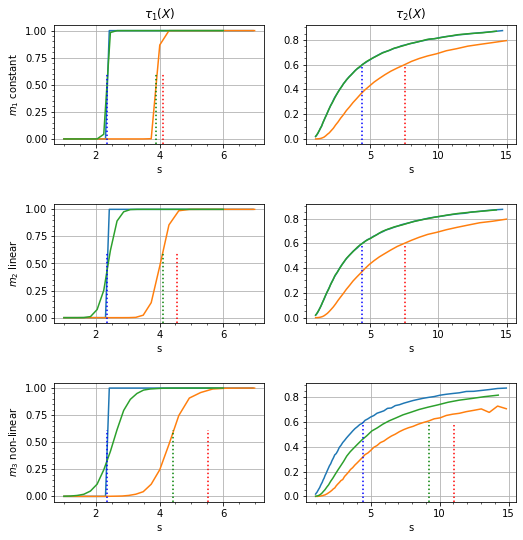

In [29]:
fig, axs = plt.subplots(3,2,figsize=(8.27,8.7675), sharex=False, sharey=False)

df2_binary = pd.read_csv("simulation_ate_zero_part_1.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian = pd.read_csv("simulation_ate_zero_part_2.csv", index_col=[0,1,2,3,4,5,6])
#df_3_gaussian= pd.read_csv("simulation_ate_zero_n_small_gaussian.csv", index_col=[0,1,2,3,4,5,6])
df_3_m3 = pd.read_csv("simulation_ate_zero_gaussian_m_3.csv", index_col=[0,1,2,3,4,5,6])

binary = df2_binary[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian = df2_gaussian[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

#gaussian = df_3_gaussian[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian_m3 = df_3_m3[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["n","treatment_to_noise_ratio"]).mean()



df2_binary_n_large = pd.read_csv("simulation_ate_zero_part_1_10000.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian_n_large = pd.read_csv("simulation_ate_zero_part_2_10000.csv", index_col=[0,1,2,3,4,5,6])

binary_n_large = df2_binary_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian_n_large = df2_gaussian_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

df_asymp_bin = pd.read_csv("simulation_binary_asymp_corrected_20000.csv", index_col=[0,1,2,3,4,5,6])
df_asymp_gauss = pd.read_csv("simulation_gaussian_asymp_corrected_20000.csv", index_col=[0,1,2,3,4,5,6])

df_asymp_bin = df_asymp_bin[["share_signif_asy_intervals_given_ite_nonzero"]].groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 25
df_asymp_gauss = df_asymp_gauss[["share_signif_asy_intervals_given_ite_nonzero"]].groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 25

plt.subplots_adjust(hspace=0.5)

# first row left

const_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "const"]
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin = const_df_bin[const_df_bin["treatment_to_noise_ratio"] <= 7.00]

const_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "const"]
const_df_bin_n_large.reset_index(level=0, inplace=True)
const_df_bin_n_large.reset_index(level=0, inplace=True)
const_df_bin_n_large = const_df_bin_n_large[const_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]

const_asym = df_asymp_bin.iloc[(df_asymp_bin.index.get_level_values('main_effect_case') == "const") & (df_asymp_bin.index.get_level_values('n') == 20000)]
const_asym.reset_index(level=0, inplace=True)
const_asym.reset_index(level=0, inplace=True)
const_asym = const_asym[const_asym["treatment_to_noise_ratio"] <= 7.00]


#axs[0, 0].set_ylim([0, 1.2])
axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_oracles_given_ite_nonzero"])

#axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[0, 0].plot(const_df_bin_n_large["treatment_to_noise_ratio"], const_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])
axs[0, 0].plot(const_asym["treatment_to_noise_ratio"], const_asym["share_signif_asy_intervals_given_ite_nonzero"])


axs[0, 0].axvline(x=4.1, ymax=0.6, color="red", linestyle=":")
axs[0, 0].axvline(x=3.9, ymax=0.6, color="green", linestyle=":")

axs[0, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[0, 0].grid(True)
axs[0, 0].minorticks_on()

axs[0, 0].set_ylabel("$m_1$ constant")
axs[0, 0].set_xlabel("s")
axs[0, 0].title.set_text("$\\tau_1(X)$")

# first row right
const_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian = const_df_gaussian[const_df_gaussian["treatment_to_noise_ratio"] <= 15.00]

const_df_gaussian_n_large = gaussian_n_large.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian_n_large.reset_index(level=0, inplace=True)
const_df_gaussian_n_large.reset_index(level=0, inplace=True)
const_df_gaussian_n_large = const_df_gaussian_n_large[const_df_gaussian_n_large["treatment_to_noise_ratio"] <= 15.00]

const_asym_g = df_asymp_gauss.iloc[(df_asymp_gauss.index.get_level_values('main_effect_case') == "const") & (df_asymp_gauss.index.get_level_values('n') == 20000)]
const_asym_g.reset_index(level=0, inplace=True)
const_asym_g.reset_index(level=0, inplace=True)
const_asym_g = const_asym_g[const_asym_g["treatment_to_noise_ratio"] <= 15.00]



#axs[0, 1].set_ylim([0, 1.2])
axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_oracles_given_ite_nonzero"])

#axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[0, 1].plot(const_df_gaussian_n_large["treatment_to_noise_ratio"], const_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])
axs[0, 1].plot(const_asym_g["treatment_to_noise_ratio"], const_asym_g["share_signif_asy_intervals_given_ite_nonzero"])



axs[0, 1].axvline(x=7.586, ymax=0.67, color="red", linestyle=":")
axs[0, 1].axvline(x=4.431446,ymax=0.67, color="blue", linestyle=":")

axs[0, 1].grid(True)
axs[0, 1].minorticks_on()
axs[0, 1].set_xlabel("s")
axs[0, 1].title.set_text('$\\tau_2(X)$')


# second row left
lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin = lin_df_bin[lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]

lin_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin_n_large.reset_index(level=0, inplace=True)
lin_df_bin_n_large.reset_index(level=0, inplace=True)
lin_df_bin_n_large = lin_df_bin_n_large[lin_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]

const_asym_lin = df_asymp_bin.iloc[(df_asymp_bin.index.get_level_values('main_effect_case') == "linear") & (df_asymp_bin.index.get_level_values('n') == 20000)]
const_asym_lin.reset_index(level=0, inplace=True)
const_asym_lin.reset_index(level=0, inplace=True)
const_asym_lin = const_asym_lin[const_asym_lin["treatment_to_noise_ratio"] <= 7.00]


axs[1, 0].set_ylabel("$m_2$ linear")
#axs[1, 0].set_ylim([0, 1.2])

axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_oracles_given_ite_nonzero"])

#axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[1, 0].plot(lin_df_bin_n_large["treatment_to_noise_ratio"] , lin_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])
axs[1, 0].plot(const_asym_lin["treatment_to_noise_ratio"], const_asym_lin["share_signif_asy_intervals_given_ite_nonzero"])


axs[1, 0].axvline(x=4.1, ymax=0.6, color="green", linestyle=":")
axs[1, 0].axvline(x=4.55, ymax=0.6, color="red", linestyle=":")

axs[1, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[1, 0].set_xlabel("s")
axs[1, 0].grid(True)
axs[1, 0].minorticks_on()


# second row right
lin_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian = lin_df_gaussian[lin_df_gaussian["treatment_to_noise_ratio"] <= 15.00]

lin_df_gaussian_n_large = gaussian_n_large.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
lin_df_gaussian_n_large = lin_df_gaussian_n_large[lin_df_gaussian_n_large["treatment_to_noise_ratio"] <= 15.00]


const_asym_g_lin = df_asymp_gauss.iloc[(df_asymp_gauss.index.get_level_values('main_effect_case') == "linear") & (df_asymp_gauss.index.get_level_values('n') == 20000)]
const_asym_g_lin.reset_index(level=0, inplace=True)
const_asym_g_lin.reset_index(level=0, inplace=True)
const_asym_g_lin = const_asym_g_lin[const_asym_g_lin["treatment_to_noise_ratio"] <= 15.00]


#axs[1, 1].set_ylim([0, 1.2])
axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])

#axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[1, 1].plot(lin_df_gaussian_n_large["treatment_to_noise_ratio"] , lin_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])
axs[1, 1].plot(const_asym_g_lin["treatment_to_noise_ratio"], const_asym_g_lin["share_signif_asy_intervals_given_ite_nonzero"])


axs[1, 1].axvline(x=7.586129, ymax=0.66, color="red", linestyle=":")
axs[1, 1].axvline(x=4.431446, ymax=0.66, color="blue", linestyle=":")

axs[1, 1].grid(True)
axs[1, 1].minorticks_on()
axs[1, 1].set_xlabel("s")


# third row left
non_lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin = non_lin_df_bin[non_lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]


non_lin_df_bin_n_large = binary_n_large.iloc[binary_n_large.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin_n_large.reset_index(level=0, inplace=True)
non_lin_df_bin_n_large.reset_index(level=0, inplace=True)
non_lin_df_bin_n_large = non_lin_df_bin_n_large[non_lin_df_bin_n_large["treatment_to_noise_ratio"] <= 7.00]

const_asym_nonlin = df_asymp_bin.iloc[(df_asymp_bin.index.get_level_values('main_effect_case') == "non-linear") & (df_asymp_bin.index.get_level_values('n') == 20000)]
const_asym_nonlin.reset_index(level=0, inplace=True)
const_asym_nonlin.reset_index(level=0, inplace=True)
const_asym_nonlin = const_asym_nonlin[const_asym_nonlin["treatment_to_noise_ratio"] <= 7.00]



#axs[2, 0].set_ylim([0, 1.2])
axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_oracles_given_ite_nonzero"])

#axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[2, 0].plot(non_lin_df_bin_n_large["treatment_to_noise_ratio"] , non_lin_df_bin_n_large["share_signif_intervals_given_ite_nonzero"])
axs[2, 0].plot(const_asym_nonlin["treatment_to_noise_ratio"], const_asym_nonlin["share_signif_asy_intervals_given_ite_nonzero"])


axs[2, 0].axvline(x=5.508475, ymax=0.6, color="red", linestyle=":")
axs[2, 0].axvline(x=4.42, ymax=0.6, color="green", linestyle=":")

axs[2, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[2, 0].grid(True)
axs[2, 0].minorticks_on()
axs[2, 0].set_ylabel("$m_3$ non-linear")
axs[2, 0].set_xlabel("s")


# third row right

non_lin_df_gaussian = gaussian_m3.iloc[gaussian_m3.index.get_level_values('n') == 2000]
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian = non_lin_df_gaussian[non_lin_df_gaussian["treatment_to_noise_ratio"]  <= 15.00]


#non_lin_df_gaussian = gaussian_m3.iloc[gaussian_m3.index.get_level_values('main_effect_case') == "non-linear"]
#non_lin_df_gaussian.reset_index(level=0, inplace=True)
#non_lin_df_gaussian.reset_index(level=0, inplace=True)
#non_lin_df_gaussian = non_lin_df_gaussian[non_lin_df_gaussian["treatment_to_noise_ratio"]  <= 15.00]



non_lin_df_gaussian_n_large = gaussian_m3.iloc[gaussian_m3.index.get_level_values('n') == 20000]
non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
non_lin_df_gaussian_n_large = non_lin_df_gaussian_n_large[non_lin_df_gaussian_n_large["treatment_to_noise_ratio"]  <= 15.00]


#non_lin_df_gaussian_n_large = gaussian_m3.iloc[gaussian_n_large.index.get_level_values('main_effect_case') == "non-linear"]
#non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
#non_lin_df_gaussian_n_large.reset_index(level=0, inplace=True)
#non_lin_df_gaussian_n_large = non_lin_df_gaussian_n_large[non_lin_df_gaussian_n_large["treatment_to_noise_ratio"]  <= 15.00]

const_asym_g_nonlin = df_asymp_gauss.iloc[(df_asymp_gauss.index.get_level_values('main_effect_case') == "non-linear") & (df_asymp_gauss.index.get_level_values('n') == 20000)]
const_asym_g_nonlin.reset_index(level=0, inplace=True)
const_asym_g_nonlin.reset_index(level=0, inplace=True)
const_asym_g_nonlin = const_asym_g_nonlin[const_asym_g_nonlin["treatment_to_noise_ratio"] <= 15.00]



#axs[2, 1].set_ylim([0, 1.2])
axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])

#axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[2, 1].plot(non_lin_df_gaussian_n_large["treatment_to_noise_ratio"] , non_lin_df_gaussian_n_large["share_signif_intervals_given_ite_nonzero"])
axs[2, 1].plot(const_asym_g_nonlin["treatment_to_noise_ratio"], const_asym_g_nonlin["share_signif_asy_intervals_given_ite_nonzero"])


axs[2, 1].axvline(x=11.006686, ymax=0.65, color="red", linestyle=":")
axs[2, 1].axvline(x=9.23, ymax=0.67, color="green", linestyle=":")

axs[2, 1].axvline(x=4.431446, ymax=0.67, color="blue", linestyle=":")

axs[2, 1].grid(True)
axs[2, 1].minorticks_on()
axs[2, 1].set_xlabel("s")


plt.savefig('figure_ite_n_20000.pdf')

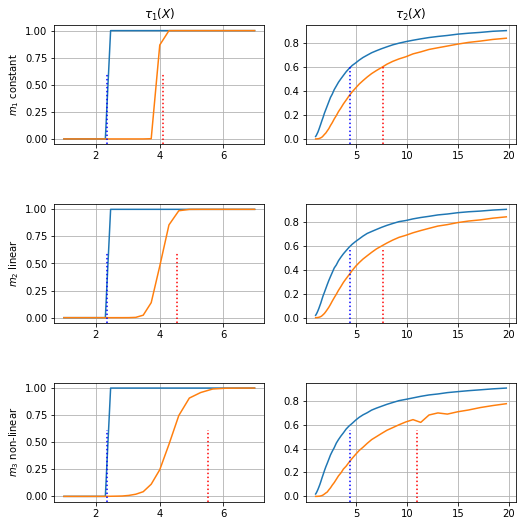

In [27]:
fig, axs = plt.subplots(3,2,figsize=(8.27,8.7675), sharex=False, sharey=False)

df2_binary_n_large = pd.read_csv("simulation_ate_zero_part_1_10000.csv", index_col=[0,1,2,3,4,5,6])
df2_gaussian_n_large = pd.read_csv("simulation_ate_zero_part_2_10000.csv", index_col=[0,1,2,3,4,5,6])

binary_n_large = df2_binary_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()
gaussian_n_large = df2_gaussian_n_large[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()


plt.subplots_adjust(hspace=0.5)

# first row left

const_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "const"]
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin.reset_index(level=0, inplace=True)
const_df_bin = const_df_bin[const_df_bin["treatment_to_noise_ratio"] <= 7.00]

#axs[0, 0].set_ylim([0, 1.2])
axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_oracles_given_ite_nonzero"])
axs[0, 0].plot(const_df_bin["treatment_to_noise_ratio"], const_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[0, 0].axvline(x=4.1, ymax=0.6, color="red", linestyle=":")
axs[0, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[0, 0].grid(True)
axs[0, 0].set_ylabel("$m_1$ constant")
axs[0, 0].title.set_text("$\\tau_1(X)$")

# first row right
const_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "const"]
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian.reset_index(level=0, inplace=True)
const_df_gaussian = const_df_gaussian[const_df_gaussian["treatment_to_noise_ratio"] <= 20.00]

#axs[0, 1].set_ylim([0, 1.2])
axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_oracles_given_ite_nonzero"])
axs[0, 1].plot(const_df_gaussian["treatment_to_noise_ratio"], const_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[0, 1].axvline(x=7.586, ymax=0.67, color="red", linestyle=":")
axs[0, 1].axvline(x=4.431446,ymax=0.67, color="blue", linestyle=":")

axs[0, 1].grid(True)
axs[0, 1].title.set_text('$\\tau_2(X)$')


# second row left
lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "linear"]
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin.reset_index(level=0, inplace=True)
lin_df_bin = lin_df_bin[lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]


axs[1, 0].set_ylabel("$m_2$ linear")
#axs[1, 0].set_ylim([0, 1.2])

axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_oracles_given_ite_nonzero"])
axs[1, 0].plot(lin_df_bin["treatment_to_noise_ratio"] , lin_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[1, 0].axvline(x=4.55, ymax=0.6, color="red", linestyle=":")
axs[1, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[1, 0].grid(True)



# second row right
lin_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "linear"]
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian.reset_index(level=0, inplace=True)
lin_df_gaussian = lin_df_gaussian[lin_df_gaussian["treatment_to_noise_ratio"] <= 20.00]

#axs[1, 1].set_ylim([0, 1.2])
axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])
axs[1, 1].plot(lin_df_gaussian["treatment_to_noise_ratio"] , lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[1, 1].axvline(x=7.586129, ymax=0.61, color="red", linestyle=":")
axs[1, 1].axvline(x=4.431446, ymax=0.61, color="blue", linestyle=":")

axs[1, 1].grid(True)


# third row left
non_lin_df_bin = binary.iloc[binary.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin.reset_index(level=0, inplace=True)
non_lin_df_bin = non_lin_df_bin[non_lin_df_bin["treatment_to_noise_ratio"]  <= 7.00]

#axs[2, 0].set_ylim([0, 1.2])
axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_oracles_given_ite_nonzero"])
axs[2, 0].plot(non_lin_df_bin["treatment_to_noise_ratio"] , non_lin_df_bin["share_signif_intervals_given_ite_nonzero"])
axs[2, 0].axvline(x=5.508475, ymax=0.6, color="red", linestyle=":")
axs[2, 0].axvline(x=2.35, ymax=0.6, color="blue", linestyle=":")

axs[2, 0].grid(True)
axs[2, 0].set_ylabel("$m_3$ non-linear")


# third row right
non_lin_df_gaussian = gaussian.iloc[gaussian.index.get_level_values('main_effect_case') == "non-linear"]
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian.reset_index(level=0, inplace=True)
non_lin_df_gaussian = non_lin_df_gaussian[non_lin_df_gaussian["treatment_to_noise_ratio"]  <= 20.00]

#axs[2, 1].set_ylim([0, 1.2])
axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_oracles_given_ite_nonzero"])
axs[2, 1].plot(non_lin_df_gaussian["treatment_to_noise_ratio"] , non_lin_df_gaussian["share_signif_intervals_given_ite_nonzero"])
axs[2, 1].axvline(x=11.006686, ymax=0.6, color="red", linestyle=":")
axs[2, 1].axvline(x=4.431446, ymax=0.6, color="blue", linestyle=":")

axs[2, 1].grid(True)


plt.show()

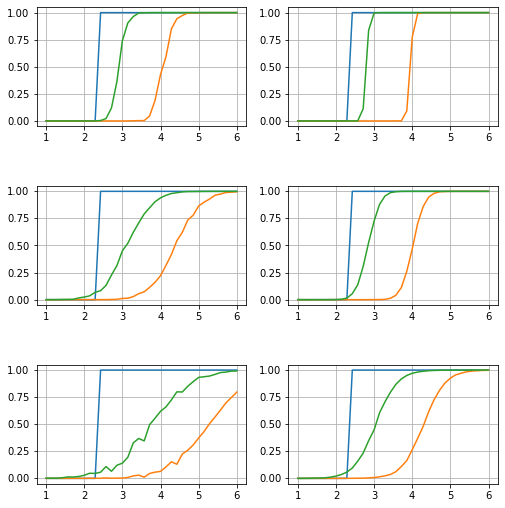

In [28]:
# constant treatment effect plots:
a = df[["MSE(ITE)","mean_oracle_length","mean_interval_length","mean_interval_length_asy", "share_signif_oracles_given_ite_nonzero", "share_signif_intervals_given_ite_nonzero","share_signif_asy_intervals_given_ite_nonzero"]].groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 75

fig, axs = plt.subplots(3,2,figsize=(8.27,8.7675), sharex=False, sharey=False)

#df = pd.read_csv("simulation_constant_treat.csv", index_col=[0,1,2,3,4,5])
#a = df[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

plt.subplots_adjust(hspace=0.5)

# first row left

const_df = a.iloc[(a.index.get_level_values('main_effect_case') == "const") & (a.index.get_level_values('n') == 2000)]
const_df.reset_index(level=0, inplace=True)
const_df.reset_index(level=0, inplace=True)
const_df = const_df[const_df["treatment_to_noise_ratio"] <= 6.00]

#axs[0, 0].set_ylim([0, 1.2])
axs[0,0].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_oracles_given_ite_nonzero"])
axs[0,0].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_intervals_given_ite_nonzero"])
axs[0,0].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_asy_intervals_given_ite_nonzero"])
#axs[0].axvline(x=4, ymax=0.6, color="red", linestyle=":")
#axs[0].axvline(x=2.40, ymax=0.6, color="blue", linestyle=":")


axs[0, 0].grid(True)

# second row left
linear_df = a.iloc[(a.index.get_level_values('main_effect_case') == "linear") & (a.index.get_level_values('n') == 2000)]
linear_df.reset_index(level=0, inplace=True)
linear_df.reset_index(level=0, inplace=True)
linear_df = linear_df[linear_df["treatment_to_noise_ratio"] <= 6.00]
#linear_df = linear_df[linear_df["treatment_to_noise_ratio"] / 2.45 <= 2.50]


#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_oracles_given_ite_nonzero"])
#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_intervals_given_ite_nonzero"])

axs[1,0].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_oracles_given_ite_nonzero"])
axs[1,0].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_intervals_given_ite_nonzero"])
axs[1,0].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_asy_intervals_given_ite_nonzero"])

#axs[1].axvline(x=4.05/2.45, ymax=0.6, color="red", linestyle=":")
#axs[1].axvline(x=2.4/2.45, ymax=0.6, color="blue", linestyle=":")

axs[1, 0].grid(True)


# third row left
non_linear = a.iloc[(a.index.get_level_values('main_effect_case') == "non-linear") & (a.index.get_level_values('n') == 2000)]
non_linear.reset_index(level=0, inplace=True)
non_linear.reset_index(level=0, inplace=True)
non_linear = non_linear[non_linear["treatment_to_noise_ratio"] <= 6.0]

#axs[2, 0].set_ylim([0, 1.2])
axs[2,0].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_oracles_given_ite_nonzero"])
axs[2,0].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_intervals_given_ite_nonzero"])
axs[2,0].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_asy_intervals_given_ite_nonzero"])

#axs[2].axvline(x=5.408163/2.65, ymax=0.6, color="red", linestyle=":")
#axs[2].axvline(x=2.4/2.65, ymax=0.6, color="blue", linestyle=":")

axs[2, 0].grid(True)

const_df = a.iloc[(a.index.get_level_values('main_effect_case') == "const") & (a.index.get_level_values('n') == 20000)]
const_df.reset_index(level=0, inplace=True)
const_df.reset_index(level=0, inplace=True)
const_df = const_df[const_df["treatment_to_noise_ratio"] <= 6.00]

#axs[0, 0].set_ylim([0, 1.2])
axs[0,1].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_oracles_given_ite_nonzero"])
axs[0,1].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_intervals_given_ite_nonzero"])
axs[0,1].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_asy_intervals_given_ite_nonzero"])
#axs[0].axvline(x=4, ymax=0.6, color="red", linestyle=":")
#axs[0].axvline(x=2.40, ymax=0.6, color="blue", linestyle=":")


axs[0, 1].grid(True)

# second row left
linear_df = a.iloc[(a.index.get_level_values('main_effect_case') == "linear") & (a.index.get_level_values('n') == 20000)]
linear_df.reset_index(level=0, inplace=True)
linear_df.reset_index(level=0, inplace=True)
linear_df = linear_df[linear_df["treatment_to_noise_ratio"] <= 6.00]
#linear_df = linear_df[linear_df["treatment_to_noise_ratio"] / 2.45 <= 2.50]


#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_oracles_given_ite_nonzero"])
#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_intervals_given_ite_nonzero"])

axs[1,1].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_oracles_given_ite_nonzero"])
axs[1,1].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_intervals_given_ite_nonzero"])
axs[1,1].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_asy_intervals_given_ite_nonzero"])

#axs[1].axvline(x=4.05/2.45, ymax=0.6, color="red", linestyle=":")
#axs[1].axvline(x=2.4/2.45, ymax=0.6, color="blue", linestyle=":")

axs[1, 1].grid(True)

# third row left
non_linear = a.iloc[(a.index.get_level_values('main_effect_case') == "non-linear") & (a.index.get_level_values('n') == 20000)]
non_linear.reset_index(level=0, inplace=True)
non_linear.reset_index(level=0, inplace=True)
non_linear = non_linear[non_linear["treatment_to_noise_ratio"] <= 6.0]

#axs[2, 0].set_ylim([0, 1.2])
axs[2,1].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_oracles_given_ite_nonzero"])
axs[2,1].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_intervals_given_ite_nonzero"])
axs[2,1].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_asy_intervals_given_ite_nonzero"])

axs[2, 1].grid(True)

plt.show()

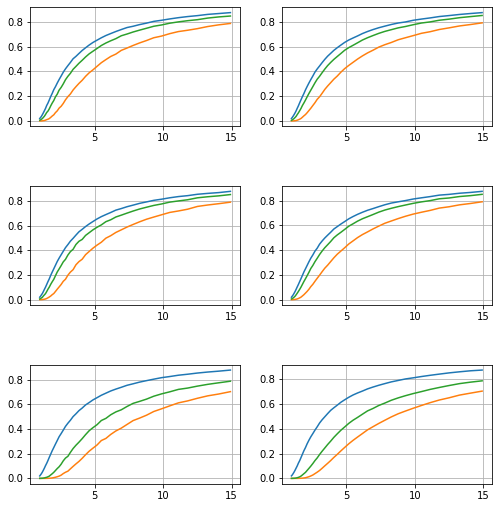

In [38]:
# constant treatment effect plots:
a = df[["MSE(ITE)","mean_oracle_length","mean_interval_length","mean_interval_length_asy", "share_signif_oracles_given_ite_nonzero", "share_signif_intervals_given_ite_nonzero","share_signif_asy_intervals_given_ite_nonzero"]].groupby(by=["treatment_to_noise_ratio", "main_effect_case", "treatment_case","n"]).sum() / 75

fig, axs = plt.subplots(3,2,figsize=(8.27,8.7675), sharex=False, sharey=False)

#df = pd.read_csv("simulation_constant_treat.csv", index_col=[0,1,2,3,4,5])
#a = df[["mean_interval_length", "mean_coverage", "mean_oracle_length", "share_intervals_signif_if_oracle_signif", "share_signif_oracles_given_ite_nonzero" ,"share_signif_intervals_given_ite_nonzero", "MSE(ITE)"]].groupby(by=["treatment_to_noise_ratio","main_effect_case"]).mean()

plt.subplots_adjust(hspace=0.5)

# first row left

const_df = a.iloc[(a.index.get_level_values('main_effect_case') == "const") & (a.index.get_level_values('n') == 2000)]
const_df.reset_index(level=0, inplace=True)
const_df.reset_index(level=0, inplace=True)
const_df = const_df[const_df["treatment_to_noise_ratio"] <= 15.00]

#axs[0, 0].set_ylim([0, 1.2])
axs[0,0].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_oracles_given_ite_nonzero"])
axs[0,0].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_intervals_given_ite_nonzero"])
axs[0,0].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_asy_intervals_given_ite_nonzero"])
#axs[0].axvline(x=4, ymax=0.6, color="red", linestyle=":")
#axs[0].axvline(x=2.40, ymax=0.6, color="blue", linestyle=":")


axs[0, 0].grid(True)

# second row left
linear_df = a.iloc[(a.index.get_level_values('main_effect_case') == "linear") & (a.index.get_level_values('n') == 2000)]
linear_df.reset_index(level=0, inplace=True)
linear_df.reset_index(level=0, inplace=True)
linear_df = linear_df[linear_df["treatment_to_noise_ratio"] <= 15.00]
#linear_df = linear_df[linear_df["treatment_to_noise_ratio"] / 2.45 <= 2.50]


#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_oracles_given_ite_nonzero"])
#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_intervals_given_ite_nonzero"])

axs[1,0].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_oracles_given_ite_nonzero"])
axs[1,0].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_intervals_given_ite_nonzero"])
axs[1,0].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_asy_intervals_given_ite_nonzero"])

#axs[1].axvline(x=4.05/2.45, ymax=0.6, color="red", linestyle=":")
#axs[1].axvline(x=2.4/2.45, ymax=0.6, color="blue", linestyle=":")

axs[1, 0].grid(True)


# third row left
non_linear = a.iloc[(a.index.get_level_values('main_effect_case') == "non-linear") & (a.index.get_level_values('n') == 2000)]
non_linear.reset_index(level=0, inplace=True)
non_linear.reset_index(level=0, inplace=True)
non_linear = non_linear[non_linear["treatment_to_noise_ratio"] <=15.00]

#axs[2, 0].set_ylim([0, 1.2])
axs[2,0].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_oracles_given_ite_nonzero"])
axs[2,0].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_intervals_given_ite_nonzero"])
axs[2,0].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_asy_intervals_given_ite_nonzero"])

#axs[2,1].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_intervals_given_ite_nonzero"])
#axs[2].axvline(x=5.408163/2.65, ymax=0.6, color="red", linestyle=":")
#axs[2].axvline(x=2.4/2.65, ymax=0.6, color="blue", linestyle=":")

axs[2, 0].grid(True)

const_df = a.iloc[(a.index.get_level_values('main_effect_case') == "const") & (a.index.get_level_values('n') == 20000)]
const_df.reset_index(level=0, inplace=True)
const_df.reset_index(level=0, inplace=True)
const_df = const_df[const_df["treatment_to_noise_ratio"] <= 15.00]

#axs[0, 0].set_ylim([0, 1.2])
axs[0,1].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_oracles_given_ite_nonzero"])
axs[0,1].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_intervals_given_ite_nonzero"])
axs[0,1].plot(const_df["treatment_to_noise_ratio"], const_df["share_signif_asy_intervals_given_ite_nonzero"])
#axs[0].axvline(x=4, ymax=0.6, color="red", linestyle=":")
#axs[0].axvline(x=2.40, ymax=0.6, color="blue", linestyle=":")


axs[0, 1].grid(True)

# second row left
linear_df = a.iloc[(a.index.get_level_values('main_effect_case') == "linear") & (a.index.get_level_values('n') == 20000)]
linear_df.reset_index(level=0, inplace=True)
linear_df.reset_index(level=0, inplace=True)
linear_df = linear_df[linear_df["treatment_to_noise_ratio"] <= 15.00]
#linear_df = linear_df[linear_df["treatment_to_noise_ratio"] / 2.45 <= 2.50]


#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_oracles_given_ite_nonzero"])
#axs[1].plot(linear_df["treatment_to_noise_ratio"] / 2.45, linear_df["share_signif_intervals_given_ite_nonzero"])

axs[1,1].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_oracles_given_ite_nonzero"])
axs[1,1].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_intervals_given_ite_nonzero"])
axs[1,1].plot(linear_df["treatment_to_noise_ratio"] , linear_df["share_signif_asy_intervals_given_ite_nonzero"])

#axs[1].axvline(x=4.05/2.45, ymax=0.6, color="red", linestyle=":")
#axs[1].axvline(x=2.4/2.45, ymax=0.6, color="blue", linestyle=":")

axs[1, 1].grid(True)

# third row left
non_linear = a.iloc[(a.index.get_level_values('main_effect_case') == "non-linear") & (a.index.get_level_values('n') == 20000)]
non_linear.reset_index(level=0, inplace=True)
non_linear.reset_index(level=0, inplace=True)
non_linear = non_linear[non_linear["treatment_to_noise_ratio"] <= 15.00]

#axs[2, 0].set_ylim([0, 1.2])
axs[2,1].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_oracles_given_ite_nonzero"])
axs[2,1].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_intervals_given_ite_nonzero"])
axs[2,1].plot(non_linear["treatment_to_noise_ratio"], non_linear["share_signif_asy_intervals_given_ite_nonzero"])

axs[2, 1].grid(True)

plt.show()

In [5]:
non_lin_df_bin_n_large

,main_effect_case,treatment_to_noise_ratio,mean_interval_length,mean_coverage,mean_oracle_length,share_intervals_signif_if_oracle_signif,share_signif_oracles_given_ite_nonzero,share_signif_intervals_given_ite_nonzero,MSE(ITE)
0,non-linear,1.000000,8.663618,0.99685,4.652349,-1.00000,0.0,0.00000,2.171367
1,non-linear,1.071872,8.628277,0.99613,4.652349,-1.00000,0.0,0.00001,2.205721
2,non-linear,1.148909,8.580658,0.99558,4.652349,-1.00000,0.0,0.00000,2.246532
3,non-linear,1.231483,8.637918,0.99631,4.652349,-1.00000,0.0,0.00000,2.211967
4,non-linear,1.319992,8.606067,0.99598,4.652349,-1.00000,0.0,0.00000,2.231317
5,non-linear,1.414863,8.600641,0.99579,4.652349,-1.00000,0.0,0.00002,2.255249
6,non-linear,1.516551,8.617771,0.99566,4.652349,-1.00000,0.0,0.00001,2.249973
7,non-linear,1.625549,8.624948,0.99624,4.652349,-1.00000,0.0,0.00000,2.206182
8,non-linear,1.742380,8.571743,0.99564,4.652349,-1.00000,0.0,0.00006,2.232439
9,non-linear,1.867608,8.626636,0.99580,4.652349,-1.00000,0.0,0.00009,2.249735


In [5]:
2.3 / np.sqrt(2)

1.626345596729059

In [ ]:
const_df_bin.group_by("")